In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Pre-Processing

In [3]:
df = pd.read_csv("./data/creditcard.csv")
df["Class"] = pd.Categorical(df["Class"])
df.shape

(284807, 31)

## Visualization

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


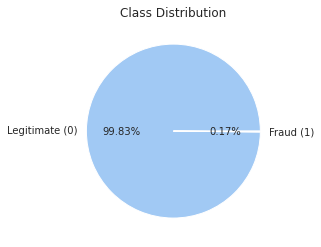

0    284315
1       492
Name: Class, dtype: int64

Baseline AUPRC Score: 0.0017304750013189597


In [5]:
counts = [df[df["Class"] == 0].shape[0], df[df["Class"] == 1].shape[0]]
labels = ["Legitimate (0)", "Fraud (1)"]

plt.pie(counts, labels=labels, colors = sns.color_palette('pastel')[:len(counts)], autopct="%.2f%%")
plt.title("Class Distribution")
plt.show()

print(df["Class"].value_counts())

print("\nBaseline AUPRC Score: {}".format(counts[1] / counts[0]))

<AxesSubplot:title={'center':'Fradulent Cases'}, xlabel='Features', ylabel='Means'>

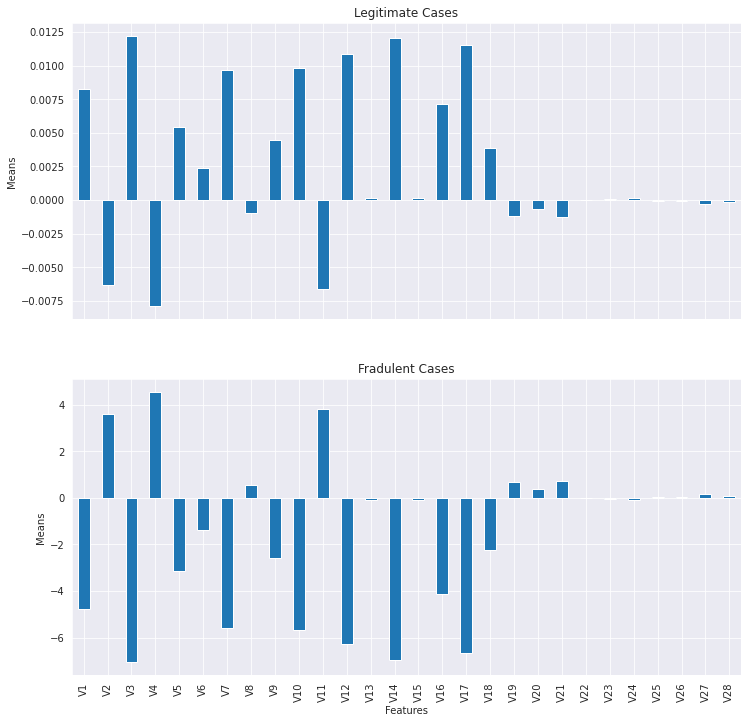

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

(df[df["Class"] == 0].iloc[:, 1:-2].mean()).plot(kind="bar", ax=axes[0], title="Legitimate Cases", xlabel="Features", ylabel="Means")
(df[df["Class"] == 1].iloc[:, 1:-2].mean()).plot(kind="bar", ax=axes[1], title="Fradulent Cases", xlabel="Features", ylabel="Means")

## Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df["Class"], test_size=0.2, stratify=df["Class"], random_state=42)

print(X_train.shape)
print(X_test.shape)

(227845, 30)
(56962, 30)


## Undersampling

To battle class imbalance, it is possible to apply undersampling methods to remove samples from the majority class.<br>
I will use imblearn which is compatible with scikit-learn and is part of scikit-learn-contrib projects.<br>

### Random Undersampling

Randomly select n rows from the majority class where n is the number of minority rows.

In [8]:
undersampled_df = df[df["Class"] == 1]
undersampled_df = undersampled_df.append(((df.sample(frac=1).reset_index(drop=True))[df["Class"] == 0]).iloc[:undersampled_df.shape[0],:], ignore_index=True)

print("Undersampled DataFrame has {} legitimate cases, {} fraudulent cases.".format(undersampled_df["Class"].value_counts()[0], undersampled_df["Class"].value_counts()[1]))

undersampled_X_train, undersampled_X_test, undersampled_y_train, undersampled_y_test = train_test_split(undersampled_df.iloc[:, :-1], undersampled_df["Class"], test_size=0.2, stratify=undersampled_df["Class"], random_state=42)

Undersampled DataFrame has 493 legitimate cases, 491 fraudulent cases.


### NearMiss

Majority class examples with minimum distance to each minority class example.<br>

In [9]:
from imblearn.under_sampling import NearMiss

undersampler = NearMiss(version=1, n_neighbors=3)
nearmiss_X, nearmiss_y = undersampler.fit_resample(df.iloc[:, :-1], df["Class"])

nearmiss_X_train, nearmiss_X_test, nearmiss_y_train, nearmiss_y_test = train_test_split(nearmiss_X, nearmiss_y, test_size=0.2, stratify=nearmiss_y, random_state=42)

### CondensedNearestNeigbour

An undersampling technique that seeks a subset of a collection of samples that results in no loss in model performance, referred to as a minimal consistent set.<br>
It is achieved by enumerating the examples in the dataset and adding them to the “store” only if they cannot be classified correctly by the current contents of the store using KNN.<br>
This the dataset I am using is too large for KNN, this undersampling method takes a very long time.<br>

from imblearn.under_sampling import CondensedNearestNeighbour

undersampler = CondensedNearestNeighbour(n_neighbors=1)
cnn_X, cnn_y = undersampler.fit_resample(df.iloc[:, :-1], df["Class"])

cnn_X_train, cnn_X_test, cnn_y_train, cnn_y_test = train_test_split(cnn_X, cnn_y, test_size=0.2, stratify=cnn_y, random_state=42)

# Modeling

In [10]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import make_scorer, roc_auc_score

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

## XGBoost

In [11]:
from xgboost import XGBClassifier

booster="gbtree" has the higher accuracy compared to "gblinear" as it uses linear functions.<br>
tree_method="hist" is 10 times faster than "auto" method.<br>
objective="binary:logistic" for binart classification.<br>
eval_metric="auc" because of extreme class imbalance.<br>
seed=42 for tuning the model. (seed is random_state in scikit).<br>

### Results on X_test

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



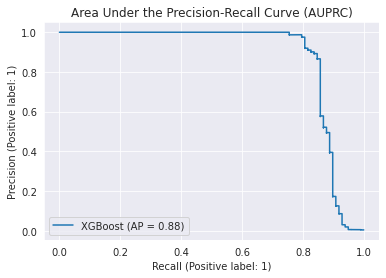

In [12]:
# xgb_param_grid = {
    #"eta": list(np.arange(0.0, 0.31, 0.05)), # learning_rate
    #"max_depth": list(np.arange(3, 11, 1)),
    #"subsample": list(np.arange(0.5, 1.01, 0.1)),
# }
# auc_scorer = make_scorer(roc_auc_score)
# halving_xgb = HalvingGridSearchCV(XGBClassifier(booster="gbtree", tree_method="hist", eta=0.25, max_depth=9, subsample=0.8, objective="binary:logistic", seed=42, use_label_encoder=False, eval_metric="auc"), xgb_param_grid, refit=True, scoring=auc_scorer)
# xgb = make_pipeline(StandardScaler(), halving_xgb)

xgb = make_pipeline(StandardScaler(), XGBClassifier(booster="gbtree", tree_method="hist", objective="binary:logistic", seed=42, use_label_encoder=False, eval_metric="auc"))
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, xgb_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, xgb_proba, name="XGBoost").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### Results of Undersampling

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.04      0.98      0.07        98

    accuracy                           0.95     56962
   macro avg       0.52      0.97      0.52     56962
weighted avg       1.00      0.95      0.98     56962



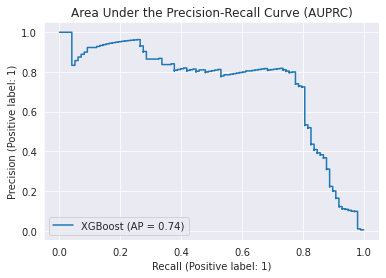

In [13]:
xgb = make_pipeline(StandardScaler(), XGBClassifier(booster="gbtree", tree_method="hist", objective="binary:logistic", seed=42, use_label_encoder=False, eval_metric="error"))
xgb.fit(undersampled_X_train, undersampled_y_train)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, xgb_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, xgb_proba, name="XGBoost").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

              precision    recall  f1-score   support

           0       1.00      0.53      0.69     56864
           1       0.00      0.99      0.01        98

    accuracy                           0.53     56962
   macro avg       0.50      0.76      0.35     56962
weighted avg       1.00      0.53      0.69     56962



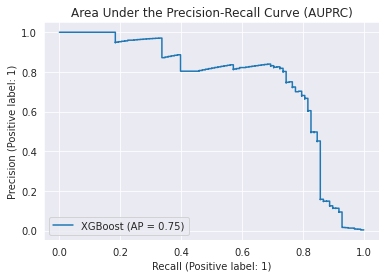

In [14]:
xgb = make_pipeline(StandardScaler(), XGBClassifier(booster="gbtree", tree_method="hist", objective="binary:logistic", seed=42, use_label_encoder=False, eval_metric="error"))
xgb.fit(nearmiss_X_train, nearmiss_y_train)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, xgb_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, xgb_proba, name="XGBoost").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

## RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

criterion="entropy" because it has higher AUPRC score than "gini".<br>
Other hyperparameters do not seem to have measurable effects.<br>

### Results on X_test

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.84      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



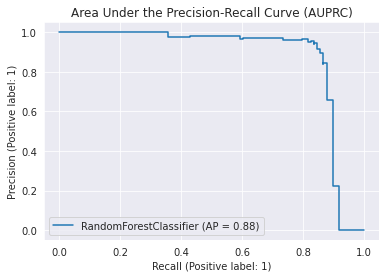

In [16]:
rfc = make_pipeline(StandardScaler(), RandomForestClassifier(criterion="entropy", n_jobs=-1, random_state=42))
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, rfc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, rfc_proba, name="RandomForestClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### Results of Undersampling

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.98      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.97      0.54     56962
weighted avg       1.00      0.97      0.98     56962



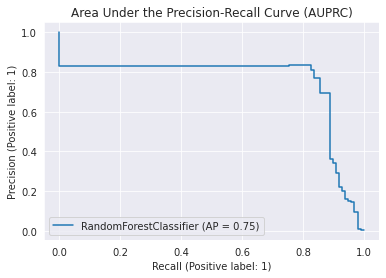

In [17]:
rfc = make_pipeline(StandardScaler(), RandomForestClassifier(criterion="entropy", n_jobs=-1, random_state=42))
rfc.fit(undersampled_X_train, undersampled_y_train)

rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, rfc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, rfc_proba, name="RandomForestClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### SGDClassifier with Kernel Approximation

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import PolynomialCountSketch

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.54      0.65        98

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



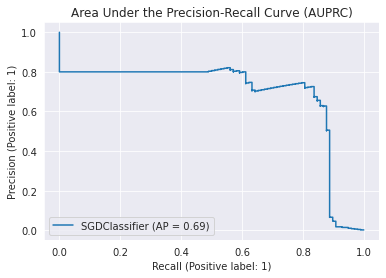

In [19]:
sgd = make_pipeline(StandardScaler(), SGDClassifier(loss="log", random_state=42))
sgd.fit(X_train, y_train)

sgd_pred = sgd.predict(X_test)
sgd_proba = sgd.predict_proba(X_test)[:, 1]

print(classification_report(y_test, sgd_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, sgd_proba, name="SGDClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.50      0.64        98

    accuracy                           1.00     56962
   macro avg       0.94      0.75      0.82     56962
weighted avg       1.00      1.00      1.00     56962



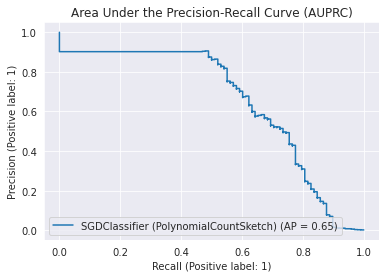

In [20]:
pcs_feature = PolynomialCountSketch(gamma=1.0, degree=2, n_components=100, random_state=42)
X_features = pd.DataFrame(pcs_feature.fit_transform(X_train))

sgd = make_pipeline(StandardScaler(), SGDClassifier(loss="log", random_state=42))
sgd.fit(X_features, y_train)

sgd_pred = sgd.predict(pd.DataFrame(pcs_feature.fit_transform(X_test)))
sgd_proba = sgd.predict_proba(pd.DataFrame(pcs_feature.fit_transform(X_test)))[:, 1]

print(classification_report(y_test, sgd_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, sgd_proba, name="SGDClassifier (PolynomialCountSketch)").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

## Resources

https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/<br>
https://scikit-learn.org/stable/modules/grid_search.html<br>
https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/<br>
https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/<br>